## Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Resources
General: 
- Hands on Machine Learning with scikit-learn and tensorflow, chapter 5, 6, 7

- Machine Learnia : https://www.youtube.com/watch?v=w_bLGK4Pteo


Decision Trees: 
- https://scikit-learn.org/stable/modules/tree.html
- https://www.lovelyanalytics.com/2016/08/16/decision-tree-comment-ca-marche/
- https://www.youtube.com/watch?v=ZVR2Way4nwQ
- https://www.youtube.com/watch?v=sgQAhG5Q7iY

Random Forests:
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
- https://www.youtube.com/watch?v=v6VJ2RO66Ag

SVM: 
- https://scikit-learn.org/stable/modules/svm.html
- https://towardsdatascience.com/a-brief-introduction-to-support-vector-machine-adf0f103a80f
- https://www.youtube.com/watch?v=_YPScrckx28
- https://www.youtube.com/watch?v=Q7vT0--5VII

Learning Curves: 
- https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
- https://towardsdatascience.com/why-you-should-be-plotting-learning-curves-in-your-next-machine-learning-project-221bae60c53

Validation Curves 
- https://scikit-learn.org/stable/modules/learning_curve.html

- Take some time to read book sections for decision tree, random forest and SVM algorithms.
- Import these algorithms from scikit-learn and find the hyperparameter options that are available when they are instantiated.


## Decision trees

Explain here how they work in your own words:

A decision tree is a supervised learning algorithm that can be used for both regression and classification. Decision trees predict values using a tree, where features in the dataset are used to determine how to split the data at each node (called a decision node). For classification, the feature used for the splitting is selected by considering which feature maximizes IG. A leaf node is obtained once the node can no longer be split based on the given stop conditions (ex: max_depth). 

In [2]:
from sklearn.datasets import load_iris

In [3]:
# Load dataset
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [4]:
# Train a decision tree with max_depth=2
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2)
dt_clf.fit(X, y)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Visualization: export_graphviz

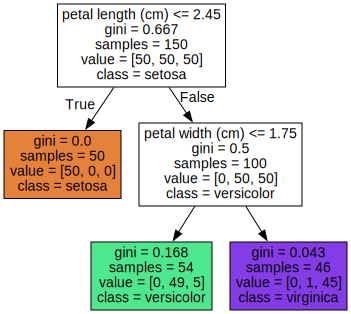

In [5]:
# Visualize decision tree using graphviz 
import graphviz

# DOT data
dot_data = tree.export_graphviz(dt_clf, out_file=None,
                                feature_names=iris.feature_names[2:],
                                class_names=iris.target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

In [6]:
tree.export_graphviz(dt_clf, out_file='iris_tree.dot',
                     feature_names=iris.feature_names[2:],
                     class_names=iris.target_names,
                     filled=True)

In [7]:
! dot -Tpng iris_tree.dot -o iris_tree.png

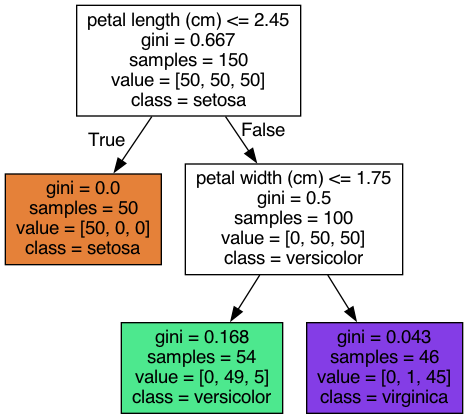

In [8]:
# open image with PIL
from IPython.display import display
from PIL import Image

image = Image.open('iris_tree.png')
display(image)

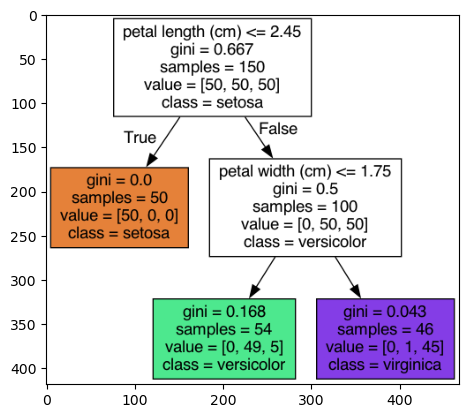

In [9]:
# open image with matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('iris_tree.png')
imgplot = plt.imshow(img)

### Visualization: plot_tree

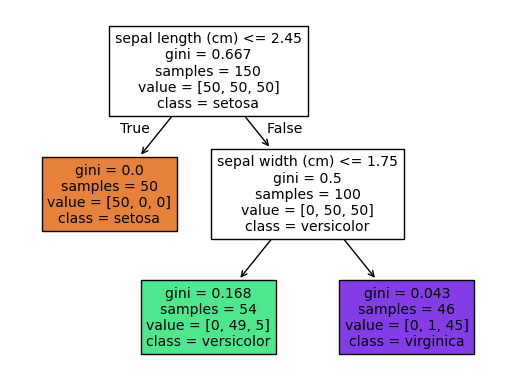

In [10]:
# visualize using the 'plot_tree' method (from the sklearn.tree module)
from sklearn.tree import plot_tree
plot = plot_tree(dt_clf, feature_names = iris.feature_names[:2], class_names = iris.target_names, filled=True)

Compute the predictions of a decision tree classifier on a test set and calculate all the classification metrics you know:


In [11]:
# split in train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state = 42, 
                                                    test_size = 0.3)


In [12]:
# fit classifier with max_depth=2
dt_clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [13]:
# make predictions on the test set
y_test_pred = dt_clf.predict(X_test)

In [14]:
# Print Accuracy
# Print Precision
# Print Recall
# Print F1-score

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

accuracy = accuracy_score(y_test, y_test_pred)
print('Accuracy score:', accuracy)
precision = precision_score(y_test, y_test_pred, 
                            labels=iris.target_names, 
                            average='macro')
print('Precision score:', precision)
recall = recall_score(y_test, y_test_pred,
                      labels=iris.target_names, 
                      average='macro')
print('Recall score:', recall)
f1 = f1_score(y_test, y_test_pred, 
              labels=iris.target_names, 
              average='macro')
print('F1 score:', f1)

Accuracy score: 1.0
Precision score: 0.0
Recall score: 0.0
F1 score: 0.0


/Users/fluids/miniconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/fluids/miniconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/fluids/miniconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[

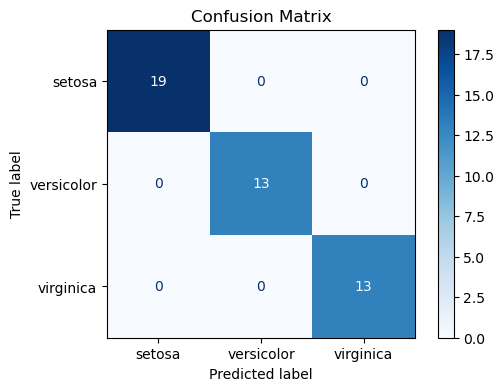

In [15]:
# Print Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(6,4))
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred,
                                        display_labels=iris.target_names, 
                                        cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix')
plt.show()

## Random forests

Explain here how they work in your own words:

In [16]:
# fit a Random Forest classifier 
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(max_depth=2, random_state=42)
rf_clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [17]:
# make predictions on the test set
y_test_pred = rf_clf.predict(X_test)

In [18]:
# Print Accuracy
# Print Precision
# Print Recall
# Print F1-score

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

accuracy = accuracy_score(y_test, y_test_pred)
print('Accuracy score:', accuracy)
precision = precision_score(y_test, y_test_pred, 
                            labels=iris.target_names, 
                            average='macro')
print('Precision score:', precision)
recall = recall_score(y_test, y_test_pred,
                      labels=iris.target_names, 
                      average='macro')
print('Recall score:', recall)
f1 = f1_score(y_test, y_test_pred, 
              labels=iris.target_names, 
              average='macro')
print('F1 score:', f1)

Accuracy score: 1.0
Precision score: 0.0
Recall score: 0.0
F1 score: 0.0


/Users/fluids/miniconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/fluids/miniconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/fluids/miniconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[

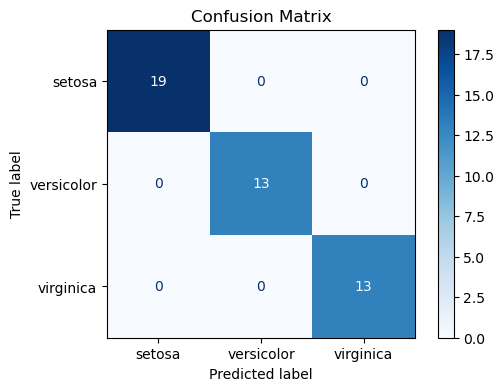

In [19]:
# Print Confusion matrix
fig, ax = plt.subplots(figsize=(6,4))
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred,
                                        display_labels=iris.target_names, 
                                        cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix')
plt.show()

## SVM

Explain here how they work in your own words:

In [20]:
# Book example SVM: iris dataset
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import LinearSVC

svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("linear_svc", LinearSVC(C=1, loss="hinge")),
        ])

In [21]:
# fit a linear SVM classifier
from sklearn.svm import SVC
svm_clf = SVC(kernel="linear", C=1)
svm_clf.fit(X_train, y_train)

,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [22]:
# make predictions on the test set
y_test_pred = svm_clf.predict(X_test)

In [23]:
# Print Accuracy
# Print Precision
# Print Recall
# Print F1-score

accuracy = accuracy_score(y_test, y_test_pred)
print('Accuracy score:', accuracy)
precision = precision_score(y_test, y_test_pred, 
                            labels=iris.target_names, 
                            average='macro')
print('Precision score:', precision)
recall = recall_score(y_test, y_test_pred,
                      labels=iris.target_names, 
                      average='macro')
print('Recall score:', recall)
f1 = f1_score(y_test, y_test_pred, 
              labels=iris.target_names, 
              average='macro')
print('F1 score:', f1)

Accuracy score: 1.0
Precision score: 0.0
Recall score: 0.0
F1 score: 0.0


/Users/fluids/miniconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/fluids/miniconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/fluids/miniconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[

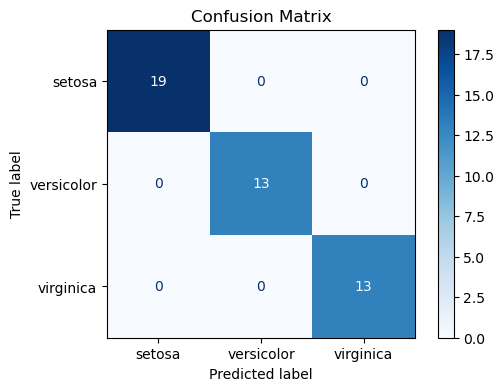

In [24]:
# Print Confusion matrix
fig, ax = plt.subplots(figsize=(6,4))
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred,
                                        display_labels=iris.target_names, 
                                        cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix')
plt.show()

## Learning curves

### Book example

In [25]:
# Book Dataset p. 128
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) 

In [26]:
from sklearn.metrics import mean_squared_error

# Implement the book’s code on learning curves on the data he has used.
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) 
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "-+", c='#003f5c',linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "-", c='#ff6361', linewidth=3, label="val")
    plt.xlabel('Training size set')
    plt.ylabel('RMSE')
    plt.legend()

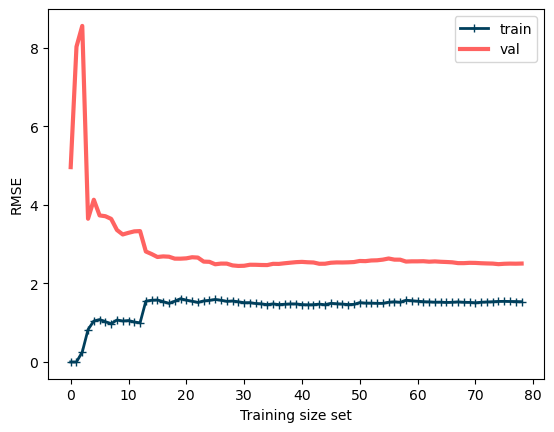

In [27]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

Change the method so that instead of having an incremental training set size going from 1 to the size of X_train, you have a fixed set of training sizes.
For example: 

training_set_sizes = np.linspace(2, len(X_train), len(X_train), dtype='int')

or 

training_set_sizes = [1, 10, 20, 30, 40, 50, 60, 70, 80]

In [28]:
# Method that plots learning curves for a given estimator and training_set_sizes
def plot_learning_curves_sizes(model, X, y, training_set_sizes):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
    train_errors, val_errors = [], []
    for m in training_set_sizes:
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "-+", c='#003f5c',linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "-", c='#ff6361', linewidth=3, label="val")
    plt.xlabel('Training size set')
    plt.ylabel('RMSE')
    plt.legend()

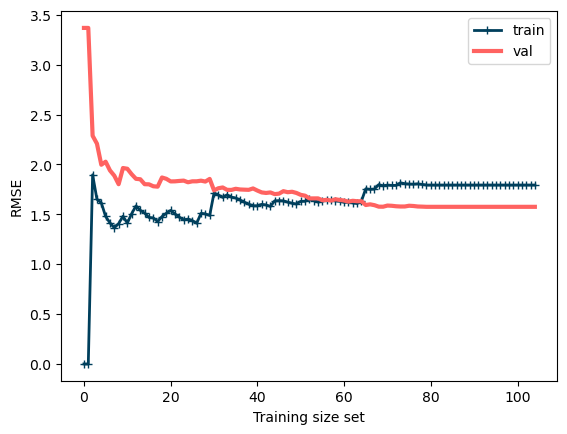

In [29]:
lin_reg = LinearRegression()
training_set_sizes = np.linspace(2, len(X_train), len(X_train), dtype='int')

plot_learning_curves_sizes(lin_reg, X, y, training_set_sizes)

## Learning curves for classifiers

Implement a ML problem on a dataset you have already seen in the course. 

Produce a plot of a model which shows signs of underfitting, and one that shows signs of overfitting.

In [30]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn import metrics
from sklearn.utils import shuffle

def plot_learning_curve(estimator, X, y, training_set_sizes, error_metric='accuracy_score', cv=None):
    train_score_means = []
    val_score_means = []

    for s in training_set_sizes:
        # # shuffle the dataset and sample
        x_subset, y_subset = shuffle(X, y, n_samples=s)

        train_scores = []
        val_scores = []
        # Define the StratifiedKFold cross-validator
        kf = StratifiedKFold(n_splits=cv, shuffle=True)
        

        for train_index, val_index in kf.split(x_subset, y_subset):
            # Split the dataset based on the fold
            X_train, X_val = x_subset.iloc[train_index,:], x_subset.iloc[val_index, :]
            y_train, y_val = y_subset.iloc[train_index], y_subset.iloc[val_index]

            # Fit the model on the training set of the fold
            estimator.fit(X_train, y_train)
            
            # Evaluate and store the result
            train_scores += [getattr(metrics, error_metric)(y_train, estimator.predict(X_train))]
            val_scores += [getattr(metrics, error_metric)(y_val, estimator.predict(X_val))]

        # Store the means
        train_score_means += [np.mean(train_scores)]
        val_score_means += [np.mean(val_scores)]

    plt.plot(training_set_sizes, train_score_means, "-+", c='#003f5c', linewidth=3, label='Training score')
    plt.plot(training_set_sizes, val_score_means, "-o", c='#ff6361', linewidth=3, label='Cross-validation score')
    plt.legend()
    plt.xlabel('Training size set')
    plt.ylabel(error_metric)

Test on iris dataset

In [31]:
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target

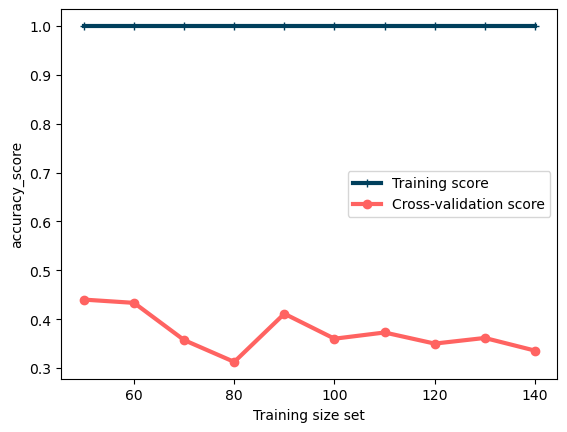

In [32]:
estimator = SVC(kernel='rbf', gamma=1e7, C=1e8)

sizes = np.arange(50, len(X), 10)

plot_learning_curve(estimator, X, y, sizes, cv=5)
# plot_learning_curve2(estimator, X, y, sizes, cv=5)

## Decision trees learning curves

In [33]:
# import the dataset you want
path_heart = '../ML2 - Classification et Clustering/ML2.1_classification_intro/data/heart.csv' 

df_heart = pd.read_csv(path_heart)

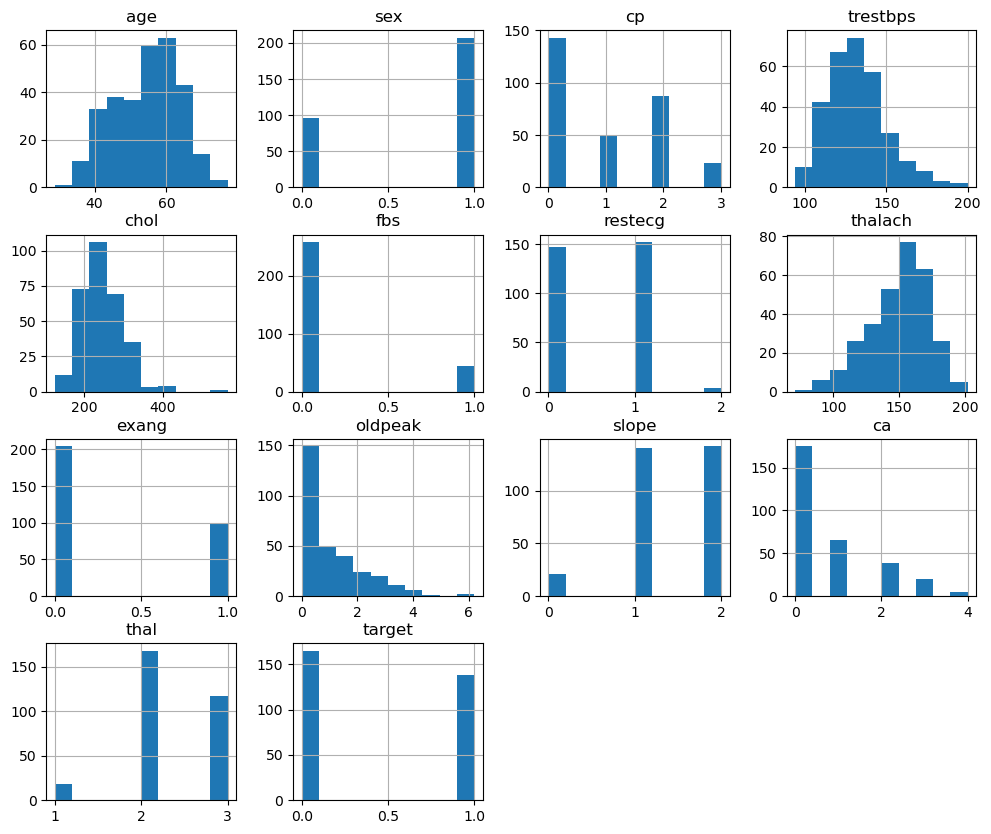

In [34]:
df_heart.hist(figsize=(12,10))
plt.show()

Use the following if you want to preprocess the data before running a model

In [35]:
# do all the pre-processing that is needed
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

#Pipelines pour chaque type
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary',
                              handle_unknown='ignore', 
                              sparse_output=False))
])

# Fusion dans un seul transformateur
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

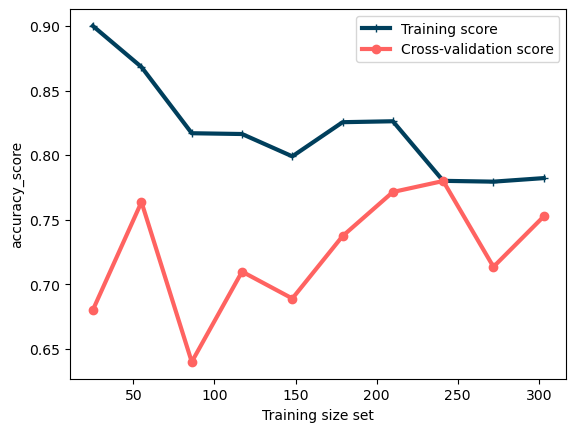

In [36]:
# Underfit model
# Train a decision tree with max_depth=2
X = df_heart.drop('target', axis=1)
y = df_heart['target']
train_s = np.linspace(25, len(X), 10, dtype='int')

model_dt = DecisionTreeClassifier(max_depth=2)

plot_learning_curve(model_dt, X, y, train_s, cv=5)

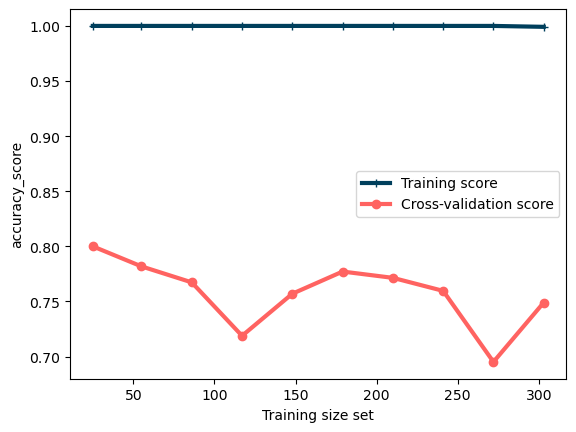

In [37]:
# Overfit model
# Train a decision tree with max_depth=10
model_dt = DecisionTreeClassifier(max_depth=10)

plot_learning_curve(model_dt, X, y, train_s, cv=5)

## Random forests classifier learning curves

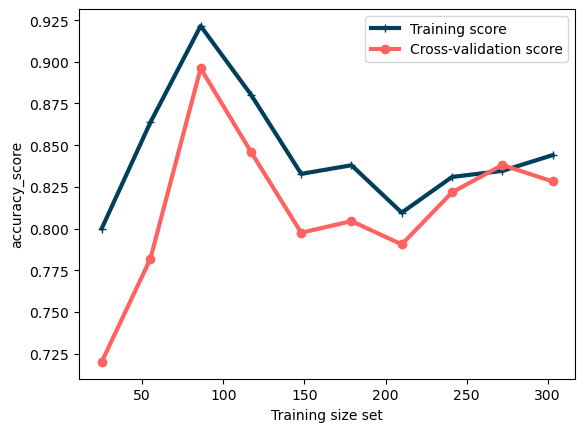

In [38]:
# Underfit model
model_rf = RandomForestClassifier(max_depth=1)

plot_learning_curve(model_rf, X, y, train_s, cv=5)

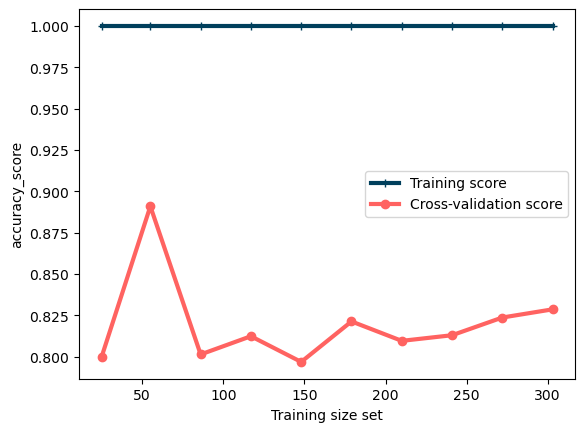

In [39]:
# Overfit model
model_rf =  RandomForestClassifier(max_depth=100)

plot_learning_curve(model_rf, X, y, train_s, cv=5)

## SVM

SVM Advantages:

- SVM’s are very good when we have no idea on the data.
- Works well with even unstructured and semi structured data like text, Images and trees.
- The kernel trick is real strength of SVM. With an appropriate kernel function, we can solve any complex problem.
- Unlike in neural networks, SVM is not solved for local optima.
- It scales relatively well to high dimensional data.
- SVM models have good generalization in practice, the risk of over-fitting is less in SVM.

SVM Disadvantages:

- Choosing a “good” kernel function is not easy.
- Long training time for large datasets.
- Difficult to understand and interpret the final model, variable weights and individual impact.
- The SVM hyper parameters are Cost -C and gamma. It is not that easy to fine-tune these hyper-parameters. It is hard to visualize their impact

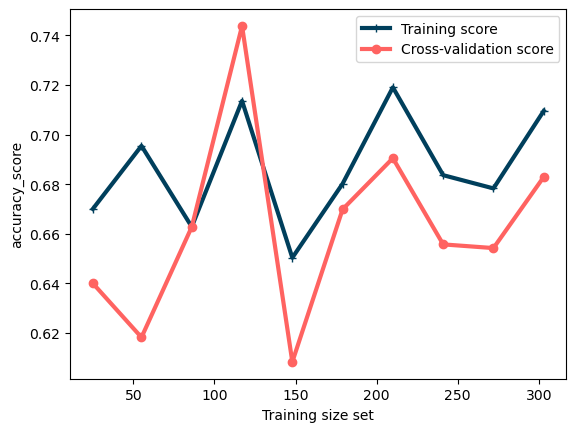

In [40]:
# Underfit model?
estimator = SVC(kernel='linear', C=1e-4)

plot_learning_curve(estimator, X, y, train_s, cv=5)

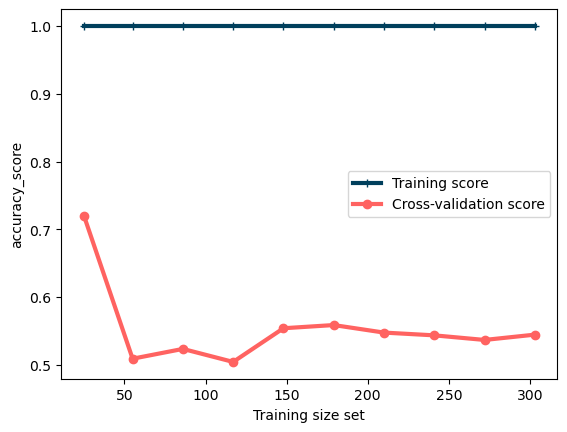

In [41]:
# Overfit model?
estimator = SVC(kernel='rbf', gamma=1e7, C=1e8)

plot_learning_curve(estimator, X, y, train_s, cv=5)

## Validation curves

Validation curves are a useful tool for improving the performance of a model by addressing issues such as overfitting or underfitting. Validation curves are related to learning curves, but instead of plotting the training and test accuracies as functions of the sample size, we vary the values of the model parameters. They are complementaru of GridSearch and make for a very nice visual tool for ypur algorithm optimization. 


In [42]:
from sklearn.model_selection import validation_curve
def plot_validation_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, param_range=None, paran_name=None):

    # create your method to plot your learning curves using the sklearn method validation_curve()
    pass

In [61]:
def plot_validation_curve(estimator, X, y, param_name=None, param_range=None, error_metric='accuracy_score', cv=None):
    train_score_means = []
    val_score_means = []

    for param in param_range:
        # # shuffle the dataset
        x_subset, y_subset = shuffle(X, y)

        train_scores = []
        val_scores = []
        # Define the StratifiedKFold cross-validator
        kf = StratifiedKFold(n_splits=cv, shuffle=True)
        

        for train_index, val_index in kf.split(x_subset, y_subset):
            # Split the dataset based on the fold
            X_train, X_val = x_subset.iloc[train_index,:], x_subset.iloc[val_index, :]
            y_train, y_val = y_subset.iloc[train_index], y_subset.iloc[val_index]

            # Fit the model on the training set of the fold
            setattr(estimator, param_name, param)
            estimator.fit(X_train, y_train)
            
            # Evaluate and store the result
            train_scores += [getattr(metrics, error_metric)(y_train, estimator.predict(X_train))]
            val_scores += [getattr(metrics, error_metric)(y_val, estimator.predict(X_val))]

        # Store the means
        train_score_means += [np.mean(train_scores)]
        val_score_means += [np.mean(val_scores)]

    plt.plot(param_range, train_score_means, "-+", c='#003f5c', linewidth=3, label='Training score')
    plt.plot(param_range, val_score_means, "-o", c='#ff6361', linewidth=3, label='Cross-validation score')
    plt.legend()
    plt.xlabel(param_name)
    plt.ylabel(error_metric)
    

Plot the validation curves for a chosen algorithm and vary 1 or 2 parameters of your choice.

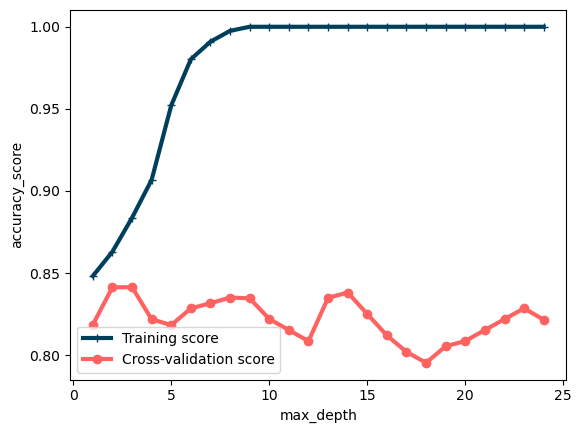

In [ ]:
model_rf =  RandomForestClassifier(n_jobs=-1)

max_depth = np.arange(1, 10)

plot_validation_curve(model_rf, X, y, param_name='max_depth', param_range=max_depth, error_metric='accuracy_score', cv=5)

In [ ]:
svm_clf = SVC(kernel='linear', n_jobs=-1)

C_vals = np.logspace(-4,3,100)

plot_validation_curve(svm_clf, X, y, param_name='C', param_range=C_vals, error_metric='accuracy_score', cv=5)

KeyboardInterrupt: 

Do a GridSearch and see if the most optimal parameter is coherent with what you see on your validation curves

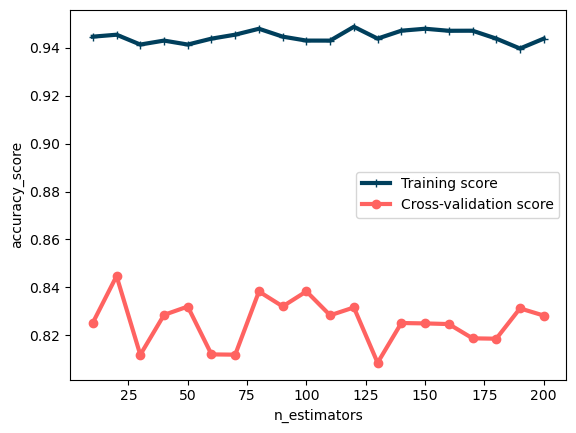

In [ ]:
model_rf = RandomForestClassifier(max_depth=5, n_jobs=-1)
model_rf = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(max_depth=5, n_jobs=-1, class_weight='balanced'))
])

n_estimators = np.arange(10, 201, 10)

plot_validation_curve(model_rf, X, y, param_name='n_estimators', param_range=n_estimators, error_metric='accuracy_score', cv=5)

In [50]:
from sklearn.datasets import load_wine

df_wine = load_wine(as_frame=True)
X_wine = df_wine.data
y_wine = df_wine.target

In [55]:
num_cols = X_wine.columns

#Pipelines pour chaque type
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Fusion dans un seul transformateur
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols)
])

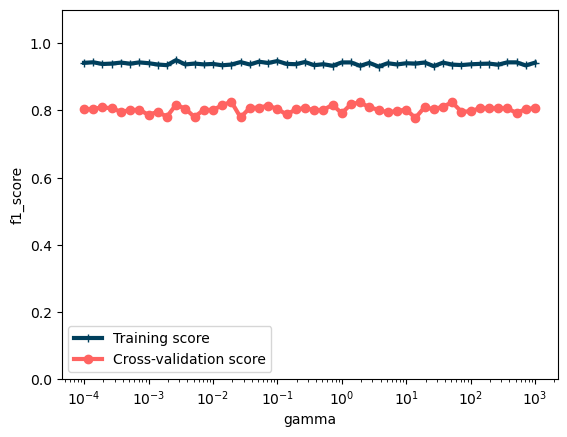

In [62]:
model_svm = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', SVC(C=1))
])

gamma_vals = np.logspace(-4, 3, 50)

plot_validation_curve(model_rf, X, y, param_name='gamma', param_range=gamma_vals, error_metric='f1_score', cv=5)
plt.ylim([0,1.1])
plt.xscale('log')